In [1]:
! pip install fastai


[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#importing libraries packages
import nltk
import re
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from nltk.stem import *
st = PorterStemmer()
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
data = pd.read_csv('/content/sample_data/spam.csv', encoding = 'latin-1')
data=data.rename({'v1':'label','v2':'text'},axis=1) #renaming the columns
print(data.head())

  label                                               text Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [4]:
#We get statistics to Generate descriptive dataset spam
data.describe()

,label,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [5]:
#Count how many rows are spam or ham 
data.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [6]:
# Find average number of tokens in all sentences
avg_words_len=round(sum([len(i.split()) for i in data['text']])/len(data['text']))
print(avg_words_len)

15


In [7]:
# Finding Total no of unique words in corpus
s = set()
for sent in data['text']:
  for word in sent.split():
	  s.add(word)
total_words_length=len(s)
print(total_words_length)

15585


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


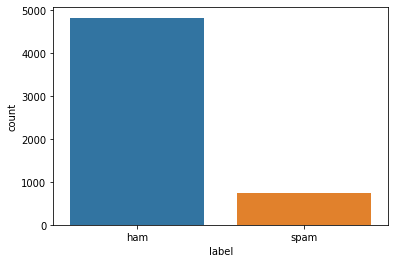

In [8]:
#analyzing dependent variables
sns.countplot(data['label'])

In [9]:
corpus = []

for i in range(len(data)):
    msg = re.sub('[^a-zA-Z]', ' ', data['text'][i]) #removing non alphabetics
    msg = msg.lower()
    msg = msg.split()
    # stop word => library search engine has been programmed to ignore that a commonly used word (such as “the”, “a”, “an”, “in”)
    msg = [st.stem(word) for word in msg if not word in stopwords.words('english')]
    msg = ' '.join(msg)
    corpus.append(msg)

data['corpus'] = corpus
data.head(30)

,label,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,corpus
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,free entri wkli comp win fa cup final tkt st m...
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,nah think goe usf live around though
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN,freemsg hey darl week word back like fun still...
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN,even brother like speak treat like aid patent
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN,per request mell mell oru minnaminungint nurun...
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN,winner valu network custom select receivea pri...
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN,mobil month u r entitl updat latest colour mob...


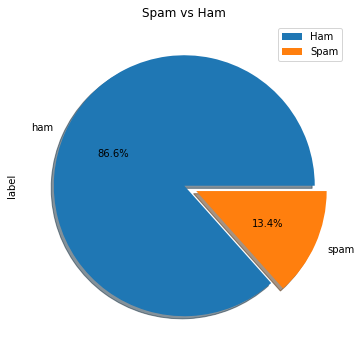

In [10]:
data["label"].value_counts().plot(kind = 'pie',explode=[0, 0.1],figsize=(6, 6),autopct='%1.1f%%',shadow=True)
plt.title("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

In [11]:
# Shows that the classes are imbalanced. There are most frequent ham messages (85%) than spam (15%)
# Percentage of spam messages
(len(data[data['label'] == 'spam']['corpus'])/len(data[data['label'] == 'ham']['corpus']))*100

15.481865284974095

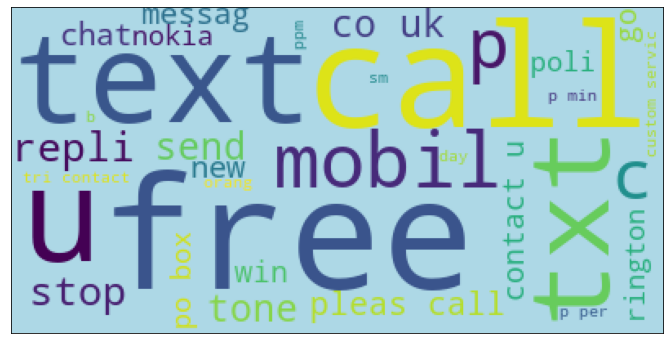

In [12]:
plt.figure(figsize = (48, 6))
wc = WordCloud(min_font_size = 10, background_color = 'lightblue')
spam_wc = wc.generate(data[data['label'] == 'spam']['corpus'].str.cat(sep = " "))
plt.xticks([])
plt.yticks([])
plt.imshow(spam_wc)

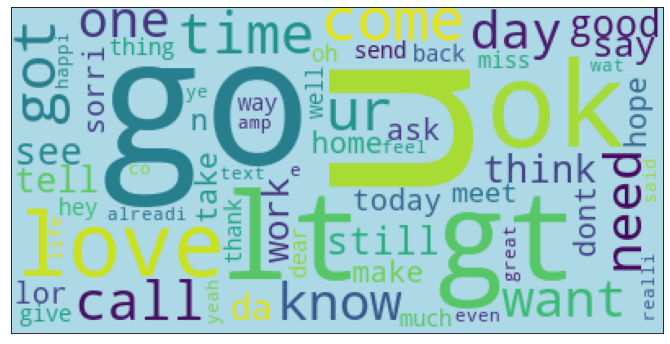

In [13]:
plt.figure(figsize = (24, 6))
wc = WordCloud(min_font_size = 10, background_color = 'lightblue')
ham_wc = wc.generate(data[data['label'] == 'ham']['corpus'].str.cat(sep = " "))
plt.xticks([])
plt.yticks([])
plt.imshow(ham_wc);

In [14]:
#transform the values of the output variable into 0 and 1
data['Temp'] = data['label'].map({'ham': 0, 'spam': 1})

In [15]:
#split the data into train and test sets
X= data['corpus']
y= data['Temp']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 434)

print('X_tarin.shape = ', X_train.shape)
print('y_train.shape = ', y_train.shape)
print('X_test.shape = ', X_test.shape)
print('y_test.shape = ', y_test.shape)

X_tarin.shape =  (4457,)
y_train.shape =  (4457,)
X_test.shape =  (1115,)
y_test.shape =  (1115,)


In [16]:
def model(model_name,X_train,y_train,X_test,y_test):
    pipeline=Pipeline([
    ('tfidf', TfidfVectorizer()),#transform the texts into the vectorized input variables X
    ('model', model_name),
    ])
    pipeline.fit(X_train,y_train)

    preds=pipeline.predict(X_test)

    print (classification_report(y_test,preds))
    print (confusion_matrix(y_test,preds))
    print('Accuracy:', pipeline.score(X_test, y_test)*100)
    print("Training Score:",pipeline.score(X_train,y_train)*100)
    score = accuracy_score(y_test,preds)
    return score

In [17]:
tfidf_vec = TfidfVectorizer().fit(X_train)
X_train_vec,X_test_vec = tfidf_vec.transform(X_train),tfidf_vec.transform(X_test)

baseline_model = MultinomialNB()
baseline_model.fit(X_train_vec,y_train)

nb_accuracy = accuracy_score(y_test,baseline_model.predict(X_test_vec))
print(nb_accuracy)
print(classification_report(y_test, baseline_model.predict(X_test_vec)))

0.9623318385650225
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       978
           1       1.00      0.69      0.82       137

    accuracy                           0.96      1115
   macro avg       0.98      0.85      0.90      1115
weighted avg       0.96      0.96      0.96      1115



In [18]:
# from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
mnb = model(MultinomialNB(),X_train,y_train,X_test,y_test)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       978
           1       1.00      0.69      0.82       137

    accuracy                           0.96      1115
   macro avg       0.98      0.85      0.90      1115
weighted avg       0.96      0.96      0.96      1115

[[978   0]
 [ 42  95]]
Accuracy: 96.23318385650225
Training Score: 98.0480143594346


In [19]:
rf=model(RandomForestClassifier(),X_train,y_train,X_test,y_test)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       978
           1       0.99      0.81      0.89       137

    accuracy                           0.98      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.98      0.98      0.97      1115

[[977   1]
 [ 26 111]]
Accuracy: 97.57847533632287
Training Score: 100.0


In [20]:
xgb=model(XGBClassifier(),X_train,y_train,X_test,y_test)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       978
           1       0.97      0.72      0.82       137

    accuracy                           0.96      1115
   macro avg       0.97      0.86      0.90      1115
weighted avg       0.96      0.96      0.96      1115

[[975   3]
 [ 39  98]]
Accuracy: 96.23318385650225
Training Score: 97.82364819385236


,Model,Accuracy_score
1,RF,0.975785
0,MNB,0.962332
2,XGBoost,0.962332


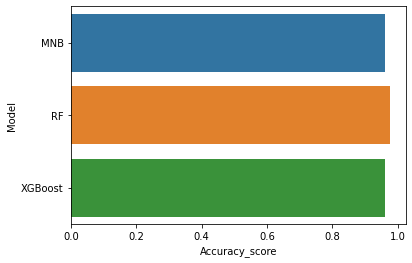

In [21]:
models = pd.DataFrame({'Model':['MNB','RF','XGBoost'],'Accuracy_score' :[mnb ,rf, xgb]})

sns.barplot(x='Accuracy_score', y='Model', data=models)
models.sort_values(by='Accuracy_score', ascending=False)